# Shubham Singh 21BAI1070

Dataset: https://www.kaggle.com/datasets/colearninglounge/predicting-pulsar-starintermediate?resource=download

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Importing Dataset

In [2]:
df = pd.read_csv('pulsar_data.csv')
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


## Data Analysis

In [3]:
df.shape

(12528, 9)

In [4]:
col_names = df.columns
col_names

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

Removing the space on the left side of the columns names.

In [5]:
df.columns = df.columns.str.strip()

In [6]:
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

### Renaming Columns

1. Mean of the integrated profile = IP Mean.
2. Standard deviation of the integrated profile = IP Sd.
3. Excess kurtosis of the integrated profile = IP Kurtosis.
4. Skewness of the integrated profile = IP Skewness.
5. Mean of the DM-SNR curve = DM - SNR Mean.
6. Standard deviation of the DM-SNR curve = DM - SNR Sd.
7. Excess kurtosis of the DM-SNR curve = DM - SNR Kurtosis.
8. Skewness of the DM-SNR curve = DM - SNR Skewness.
9. Class = target_class.

In [7]:
df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [8]:
df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

In [9]:
df['target_class'].value_counts()

0.0    11375
1.0     1153
Name: target_class, dtype: int64

In [10]:
df['target_class'].value_counts()/np.float(len(df))

<ipython-input-10-aba46d919d26>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['target_class'].value_counts()/np.float(len(df))


0.0    0.907966
1.0    0.092034
Name: target_class, dtype: float64

Therefore, we can see that the class label '0' and '1' the distribution is 90.7% and 9.2%.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          12528 non-null  float64
 1   IP Sd            12528 non-null  float64
 2   IP Kurtosis      10793 non-null  float64
 3   IP Skewness      12528 non-null  float64
 4   DM-SNR Mean      12528 non-null  float64
 5   DM-SNR Sd        11350 non-null  float64
 6   DM-SNR Kurtosis  12528 non-null  float64
 7   DM-SNR Skewness  11903 non-null  float64
 8   target_class     12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


### Removing null values

In [12]:
df.isnull().sum()

IP Mean               0
IP Sd                 0
IP Kurtosis        1735
IP Skewness           0
DM-SNR Mean           0
DM-SNR Sd          1178
DM-SNR Kurtosis       0
DM-SNR Skewness     625
target_class          0
dtype: int64

In [13]:
df.dropna(axis = 0, inplace = True)

In [14]:
df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

Therefore, there is no more null values in the dataset.

## Dealing with Outliers

In [15]:
round(df.describe(),2)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,9273.00,9273.00,9273.00,9273.00,9273.00,9273.00,9273.00,9273.00,9273.00
mean,111.13,46.51,0.48,1.79,12.74,26.33,8.33,105.78,0.09
std,25.69,6.78,1.07,6.29,29.77,19.54,4.55,108.17,0.29
min,6.19,24.77,-1.74,-1.79,0.21,7.37,-2.64,-1.98,0.00
25%,100.98,42.40,0.02,-0.19,1.91,14.38,5.79,34.92,0.00
50%,115.23,46.90,0.22,0.20,2.80,18.44,8.43,83.15,0.00
75%,127.33,51.00,0.47,0.93,5.46,28.39,10.72,139.77,0.00
max,189.73,91.81,8.07,68.10,211.95,110.64,34.54,1191.00,1.00


Text(0, 0.5, 'DM-SNR Skewness')

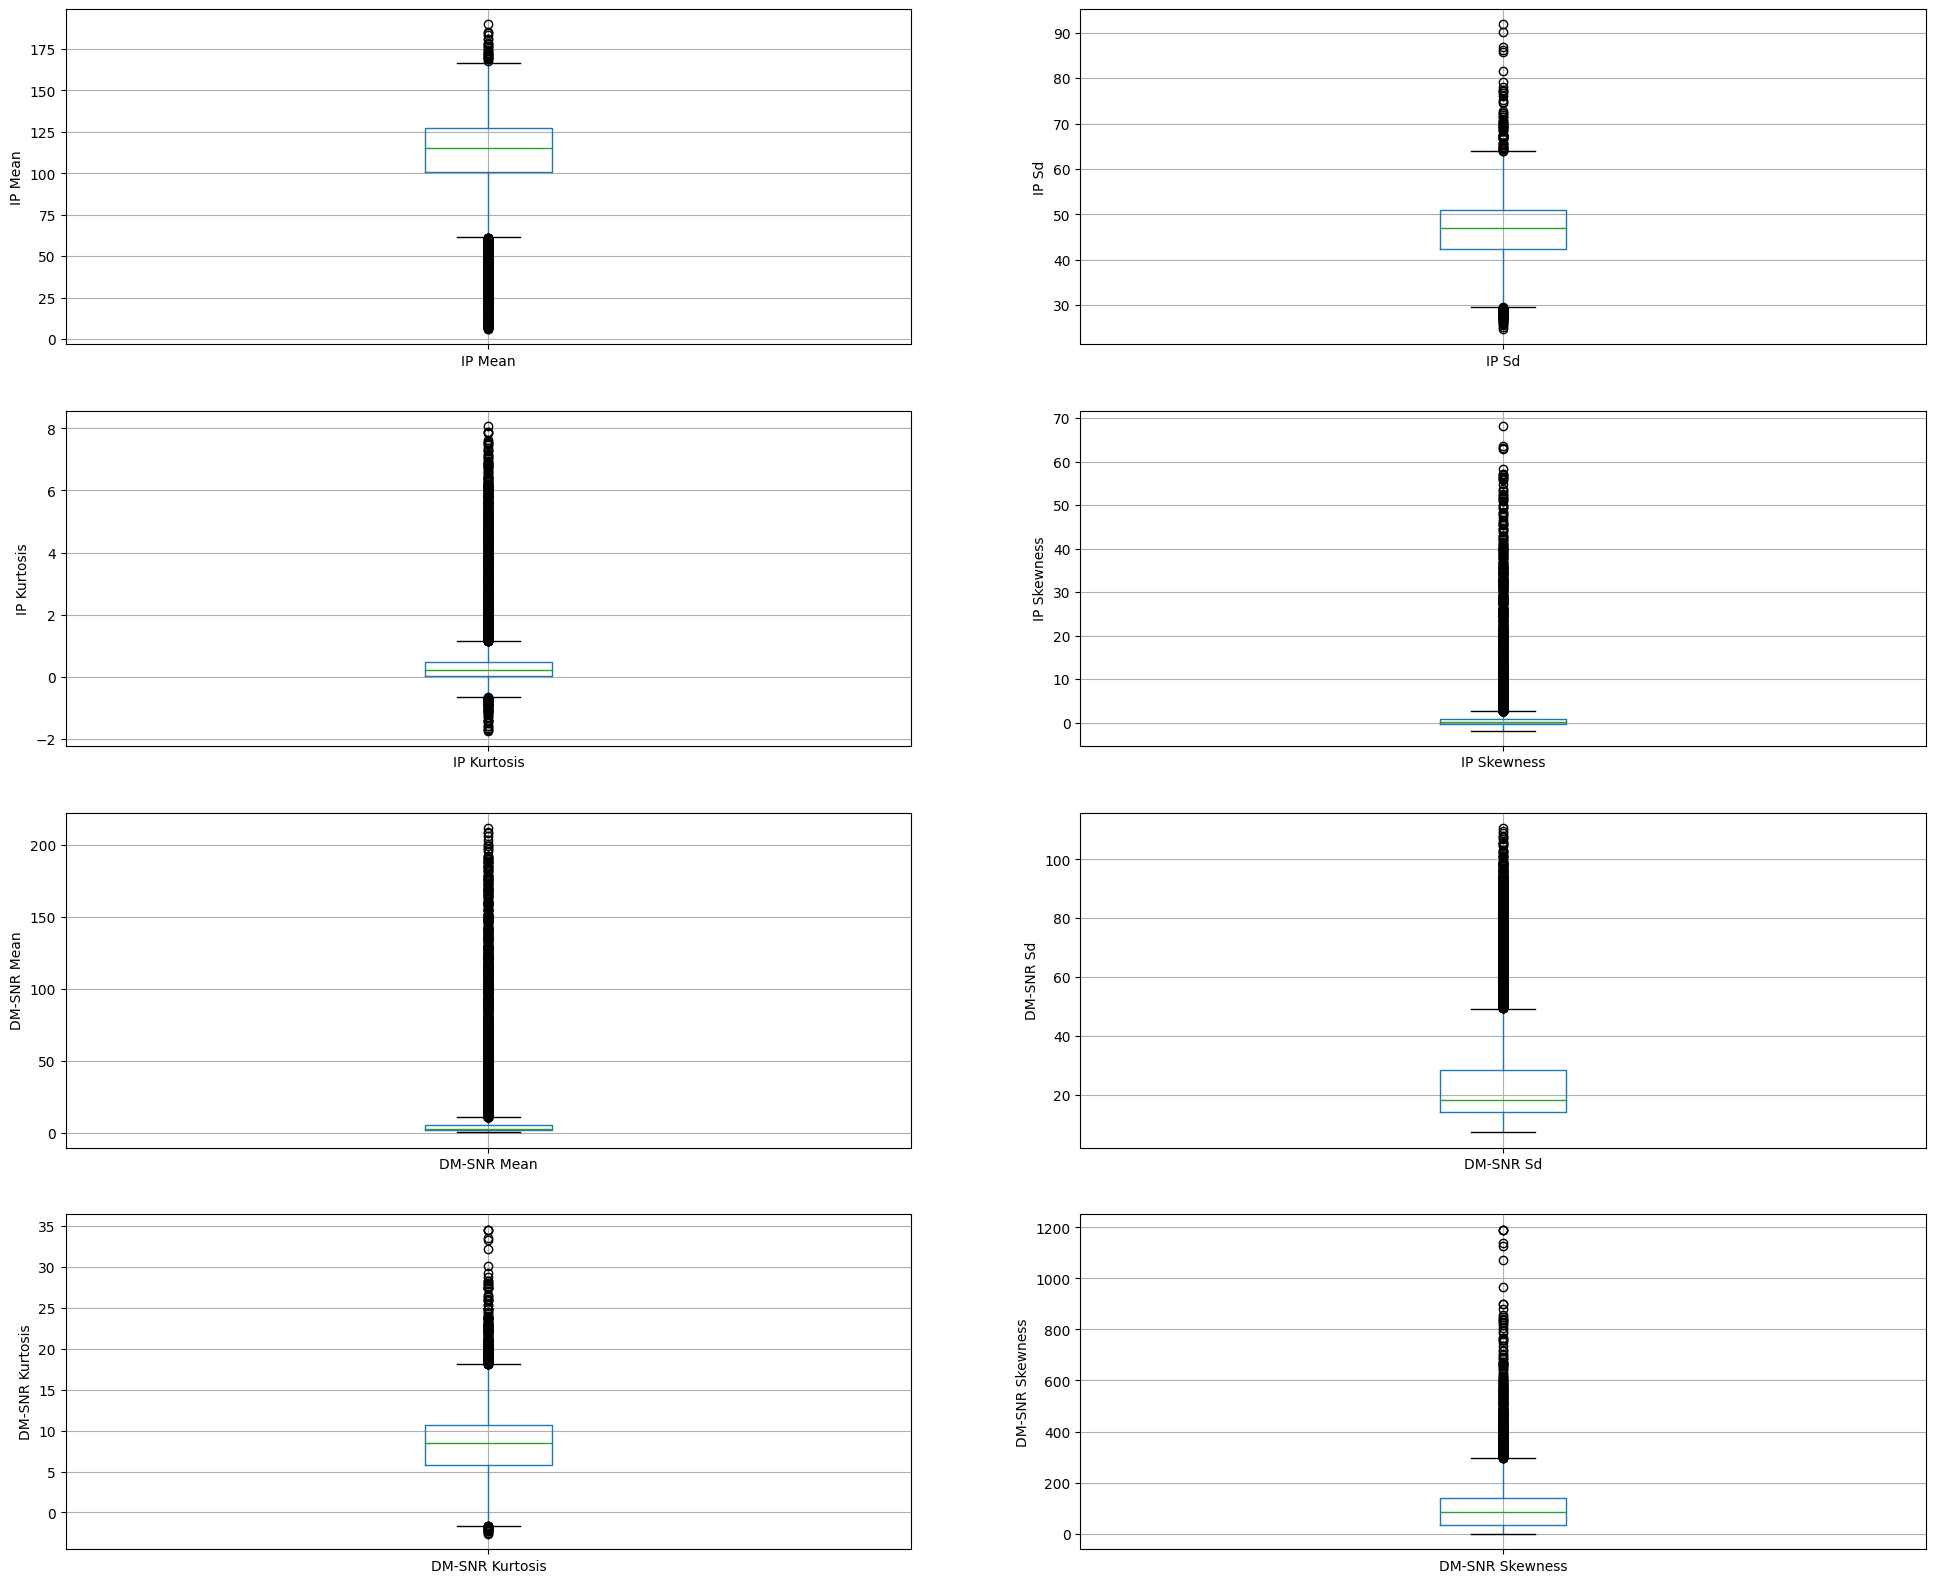

In [16]:
plt.figure(figsize=(24,20))
plt.subplot(4, 2, 1)
fig = df.boxplot(column='IP Mean')
fig.set_title('')
fig.set_ylabel('IP Mean')
plt.subplot(4, 2, 2)
fig = df.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')
plt.subplot(4, 2, 3)
fig = df.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')
plt.subplot(4, 2, 4)
fig = df.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')
plt.subplot(4, 2, 5)
fig = df.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')
plt.subplot(4, 2, 6)
fig = df.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')
plt.subplot(4, 2, 7)
fig = df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')
plt.subplot(4, 2, 8)
fig = df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')

## Data Distribution

Text(0, 0.5, 'Number of pulsar stars')

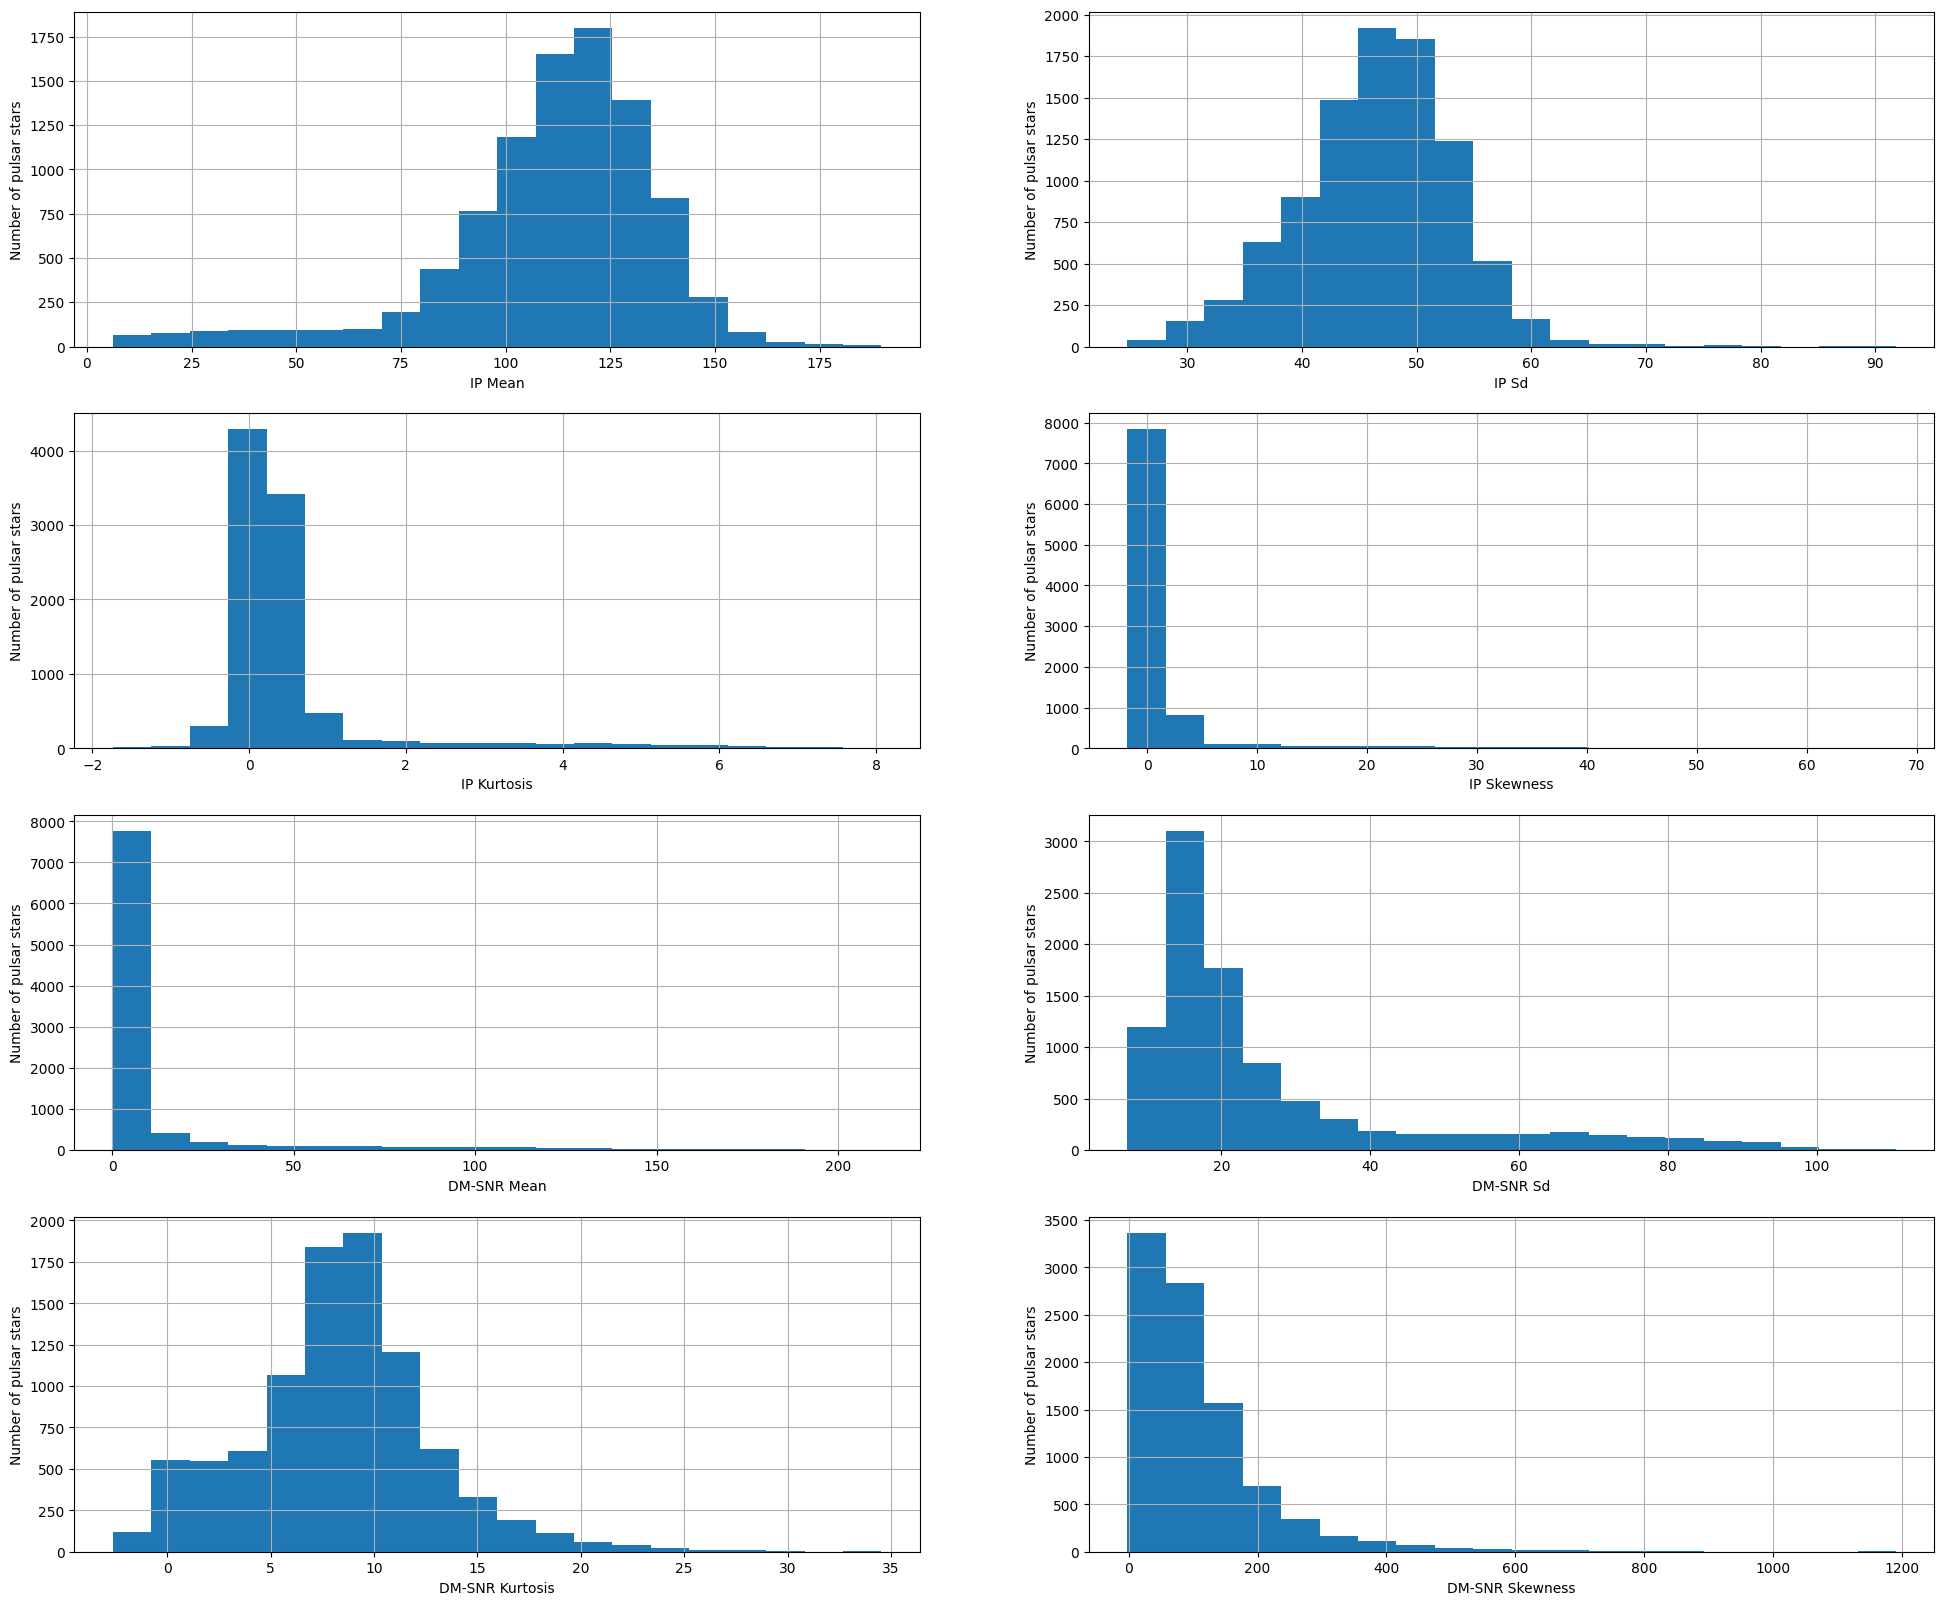

In [17]:
plt.figure(figsize=(24,20))
plt.subplot(4, 2, 1)
fig = df['IP Mean'].hist(bins=20)
fig.set_xlabel('IP Mean')
fig.set_ylabel('Number of pulsar stars')
plt.subplot(4, 2, 2)
fig = df['IP Sd'].hist(bins=20)
fig.set_xlabel('IP Sd')
fig.set_ylabel('Number of pulsar stars')
plt.subplot(4, 2, 3)
fig = df['IP Kurtosis'].hist(bins=20)
fig.set_xlabel('IP Kurtosis')
fig.set_ylabel('Number of pulsar stars')
plt.subplot(4, 2, 4)
fig = df['IP Skewness'].hist(bins=20)
fig.set_xlabel('IP Skewness')
fig.set_ylabel('Number of pulsar stars')
plt.subplot(4, 2, 5)
fig = df['DM-SNR Mean'].hist(bins=20)
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Number of pulsar stars')
plt.subplot(4, 2, 6)
fig = df['DM-SNR Sd'].hist(bins=20)
fig.set_xlabel('DM-SNR Sd')
fig.set_ylabel('Number of pulsar stars')
plt.subplot(4, 2, 7)
fig = df['DM-SNR Kurtosis'].hist(bins=20)
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Number of pulsar stars')
plt.subplot(4, 2, 8)
fig = df['DM-SNR Skewness'].hist(bins=20)
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Number of pulsar stars')

In [18]:
X = df.drop(['target_class'], axis=1)
y = df['target_class']

## Spliting dataset into training and test set

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
X_train.shape, X_test.shape

((7418, 8), (1855, 8))

## Feature Scaling

In [21]:
cols = X_train.columns

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [24]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [25]:
X_train.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,7.418000e+03,7.418000e+03,7.418000e+03,7.418000e+03,7.418000e+03,7.418000e+03,7.418000e+03,7.418000e+03
mean,1.503845e-16,2.686806e-16,2.777803e-17,1.101542e-17,-4.214597e-17,-2.107298e-17,8.812339e-17,3.352520e-18
std,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00
min,-4.062595e+00,-3.195114e+00,-2.039801e+00,-5.630418e-01,-4.201420e-01,-9.704665e-01,-2.413736e+00,-9.966851e-01
25%,-3.886562e-01,-6.095197e-01,-4.225747e-01,-3.146418e-01,-3.626540e-01,-6.104157e-01,-5.597244e-01,-6.548497e-01
50%,1.634366e-01,6.559767e-02,-2.410595e-01,-2.543538e-01,-3.327143e-01,-4.046059e-01,2.075082e-02,-2.092757e-01
75%,6.275847e-01,6.658203e-01,-1.245402e-02,-1.410595e-01,-2.422847e-01,1.101465e-01,5.199843e-01,3.063228e-01
max,2.870438e+00,5.964328e+00,6.785511e+00,9.540137e+00,6.768125e+00,4.336626e+00,5.744530e+00,9.966367e+00


## SVM with Linear Kernal

In [26]:
linear_svc=SVC(kernel='linear', C=1.0)
linear_svc.fit(X_train,y_train)
y_pred_test=linear_svc.predict(X_test)
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9747


In [27]:
linear_svc100=SVC(kernel='linear', C=100.0)
linear_svc100.fit(X_train, y_train)
y_pred=linear_svc100.predict(X_test)
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9747


### Comparing the train-set and test-set

In [28]:
y_pred_train = linear_svc.predict(X_train)
y_pred_train

array([0., 0., 0., ..., 0., 0., 0.])

In [29]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9802


In [30]:
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.9802
Test set score: 0.9747


Therefore, we can see that the score from training and test set, are close to each other. Hence, there is no overfitting and underfitting.

## Confusion Matrix

Confusion matrix

 [[1672   12]
 [  35  136]]

True Positives(TP) =  1672

True Negatives(TN) =  136

False Positives(FP) =  12

False Negatives(FN) =  35


<Axes: >

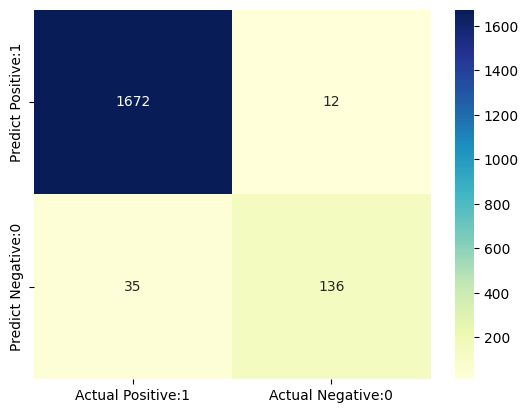

In [31]:
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')